In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')

print(df.columns)

Index(['EcYear', 'EcNumber', 'CallTime', 'EmergencyArea',
       'TotalPatientsInEmergency', 'Gender', 'Age', 'HospitalName', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved'],
      dtype='object')


<ipython-input-2-a47963fff5b3>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


In [3]:
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,12/31/20 22:41,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,12/31/20 22:25,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,12/31/20 21:54,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,12/31/20 21:24,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,12/31/20 21:03,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.fillna(method='ffill', inplace=True)

<ipython-input-4-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
df = df.sample(frac=0.1, random_state=42)

In [6]:
targets = ['InjuryType', 'PatientStatus']
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
max_iters = [50, 100, 150, 200, 250, 300]

In [7]:
def plot_learning_curve(X_train, y_train, X_test, y_test, solver, max_iters, target_name):
    train_scores, test_scores = [], []

    for max_iter in max_iters:
        model = LogisticRegression(solver=solver, max_iter=max_iter, random_state=42)
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    plt.figure()
    plt.plot(max_iters, train_scores, 'o-', label='Training Accuracy')
    plt.plot(max_iters, test_scores, 'o-', label='Test Accuracy')
    plt.xlabel('Max_iter')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {target_name} (Solver: {solver})')
    plt.legend()
    plt.show()


In [11]:
for target in targets:
    if target not in df.columns:
        print(f"Warning: Target '{target}' not found in dataset columns.")
        continue

    print(f"\nProcessing for target: {target}\n")
    X = df.drop(columns=targets)
    y = df[target]

    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = LogisticRegression(solver='liblinear', max_iter=100, random_state=42)
    model.fit(X_train, y_train)


Processing for target: InjuryType


Processing for target: PatientStatus



In [14]:

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:\n", confusion)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


Accuracy: 0.6417748917748918
Confusion Matrix:
 [[282 134   0]
 [183 311   0]
 [  3  11   0]]
Precision: 0.42819388214125054
Recall: 0.43581309041835353
F1 Score: 0.4309152972930062


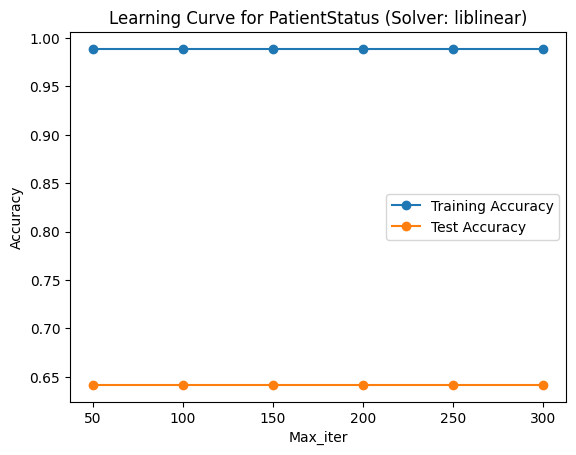

In [16]:
plot_learning_curve(X_train, y_train, X_test, y_test, solver='liblinear', max_iters=max_iters, target_name=target)